# Tree-based Algorithms:

Tree-based algorithm as the name suggests it is a flow like a tree structure that works on the principle of conditions. It is a non-parametric supervised learning method used for **classification and regression problems**:

- A classification problem tries to classify unknown elements
into a class or category; the outputs are always categorical variables (i.e. yes/no, up/down, red/blue/yellow, etc.)

- A regression problem tries to forecast a number such as the return for the next day

# Decision Trees:

The decision tree looks like a vague upside-down tree with a decision rule at the root, from which subsequent decision rules spread out below. For example, a decision rule can be whether a person exercises. There can also be nodes without any decision rules; these are called leaf nodes.

- "Decision trees create a tree-like structure by computing the relationship between independent features and a target. This is done by making use of functions that are based on comparison operators on the independent features."

### Key Terminology:
 
> Branches - Division of the whole tree is called branches.
>
> Root Node - Represent the whole sample that is further divided.
>
> Splitting - Division of nodes is called splitting.
>
> Terminal Node - Node that does not split further is called a terminal node.
>
>Decision Node -  It is a node that also gets further divided into different sub-nodes being a sub node. 
>
> Pruning - Removal of subnodes from a decision node.
>
> Parent and Child Node - When a node gets divided further then that node is termed as parent node whereas the divided nodes or the sub-nodes are termed as a child node of the parent node.

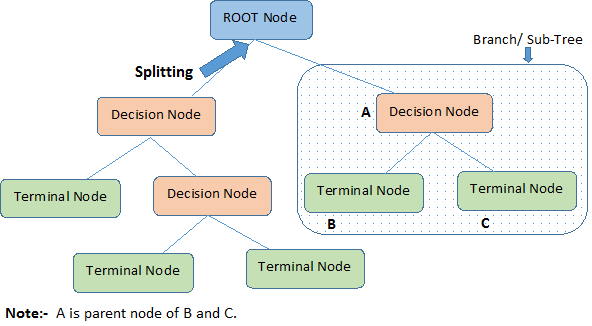

**Goal**: create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

# Assumptions


1. In the beginning, the **whole data is considered as the root**, thereafter, we use the algorithms to make a split or divide the root into subtrees.
2. The **feature values are considered to be categorical**. If the values are continuous, then they are separated prior to building the model.
3. Records are **distributed recursively** on the basis of attribute values.
4. The **ordering of attributes as root** or internal node of the tree is done using a **statistical approach**.

# Techniques for Spliting 

The major challenge in Decision Tree is the identification of the attribute for the root node in each level. This process is known as attribute selection. There are two popular attribute selection measures: 

1. Gini Index
2. Information Gain

## 1. Gini Index/Impurity
Gini Index is a metric to measure **how often a randomly chosen element would be incorrectly identified**.
 - An attribute with lower Gini index should be preferred.
 - Sklearn supports “Gini” criteria for Gini Index and by default, it takes “gini” value.
 - Index always between 0 and 1, where **0 denotes that all elements belong to a certain class** (or the division is pure), and **1 denotes that the elements are randomly distributed across various classes**
     - A Gini impurity of 0.5 denotes that the elements are distributed equally into some classes.
 - The Formula for the calculation of the of the Gini Index is given below:
 
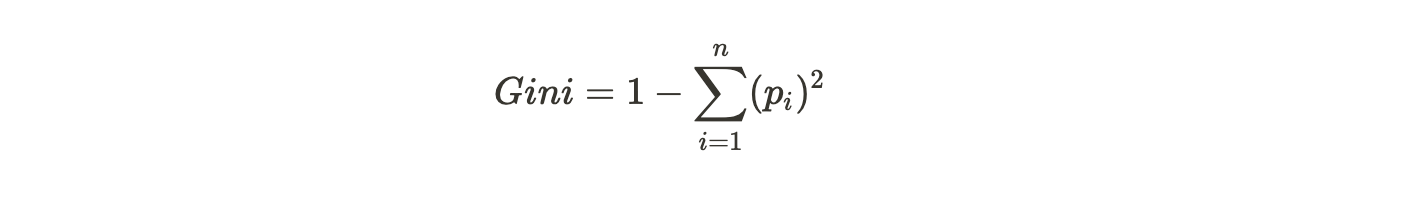 Where $p_i$ is the probability of a particular element belonging to a specific class.

> Exmaple: 
> For the s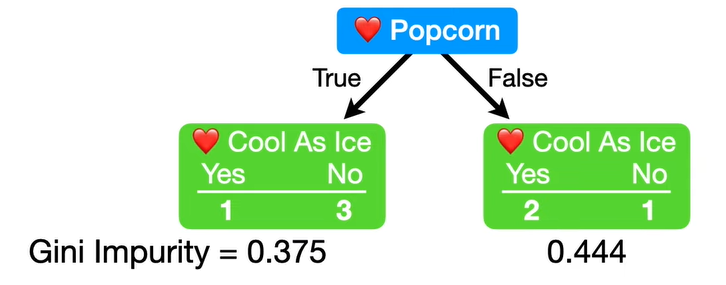

## Information Gain

Information Gain depicts the amount of information that is gained by an attribute. It is all about **finding the best nodes that return the highest information gain**. This is computed using a factor known as **Entropy**. 

- Entropy defines the degree of disorganization in a system, or a measure of uncertainty of a random variable. The more the disorganization or the more the information content is, the more is the entropy.

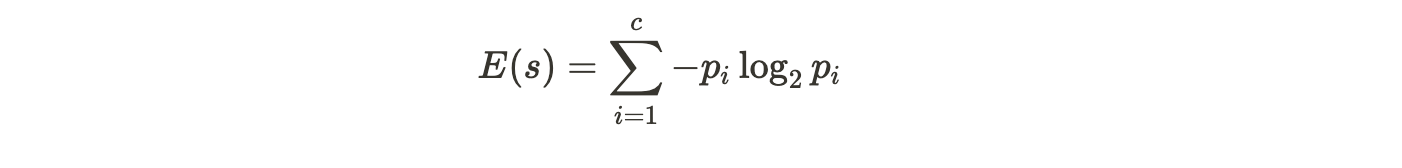 Where $p_i$ is the probability of a particular element belonging to a specific class.